# PC Lab #2 - Group 8 - Bubu, Benedikt, Berkant

## Task #1 : Visualization and 1st step toward the CAPM

Use the PCLab_Data.xlsx to produce scatter plots of each stocks’ daily returns
 against the market daily returns
 • Comment: is there an apparent correlation? Strong? For which stock

In [5]:
# Loading in csv with pandas

import pandas as pd

df = pd.read_csv(r"C:/Users/frien/OneDrive/Desktop/Bocconi/Finance with Big Data/PC labs/Data_PCLab1_Stock.csv")

print(df)

'''
Before visualizing the scatter plot, we will calculate again from the stock price data the normalized and
we should calculate the daily returns for each stock. Note, these will be taken from the last PC lab (for more
explanation) We normalize the data to make it easier to compare price changes over time as they will all be on 
the same 100% scale

'''

# Function to normalize the prices
def normalized_price(df):
    
    df = df.set_index('Date')
    initial_price = df.loc['2012-01-12']
    normalized_data = df/initial_price
    normalized_data = normalized_data.reset_index()
    return normalized_data

normalized_data = normalized_price(df)

# Convert the 'Date' column to datetime format and calculate daily returns for each stock and the market (sp500)
normalized_data['Date'] = pd.to_datetime(normalized_data['Date'])

# Calculate daily returns for each stock and the S&P 500 (market returns)
def daily_returns(df):
    # Drop the 'Date' column to perform calculations on stock prices
    df_stocks = df.drop(columns='Date')
    
    # Create a new DataFrame to store the daily returns
    df_daily_returns = pd.DataFrame(index=df.index)

    # Loop through each stock (the columns without 'Date')
    for stock in df_stocks.columns:
        # Empty list
        daily_stock_returns = []

        # Loop though each row belonging to the stock
        for p in range(1, len(df_stocks)):
            price_today = df_stocks[stock].iloc[p]
            price_yesterday = df_stocks[stock].iloc[p-1]
            daily_return = (price_today - price_yesterday)/price_yesterday * 100
            daily_stock_returns.append(daily_return)

        df_daily_returns[stock] = [float('nan')] + daily_stock_returns
    
    # Include the 'Date' column for plotting
    df_daily_returns['Date'] = df['Date']
    
    return df_daily_returns


            Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        s

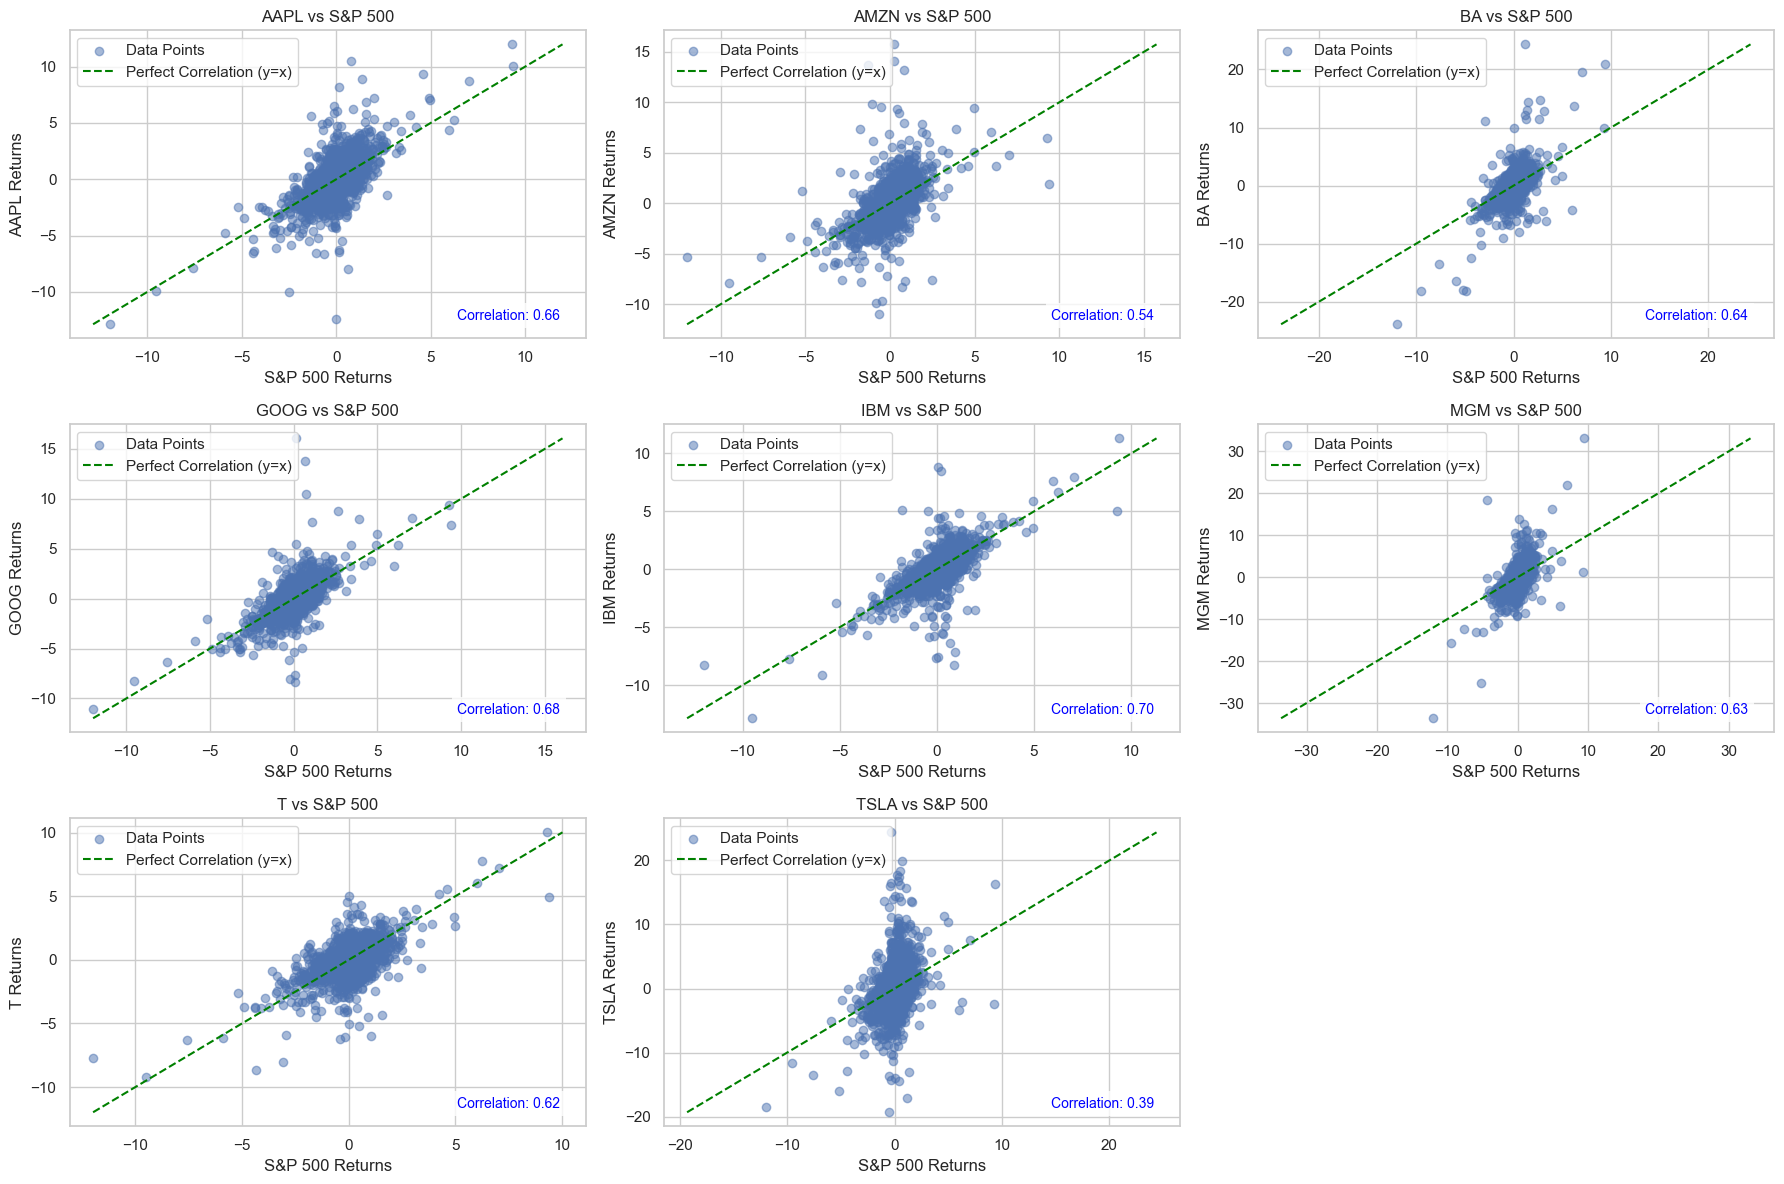

In [25]:
# Ensure date time variable
normalized_data['Date'] = pd.to_datetime(normalized_data['Date'])

# Calculate daily returns using the function based on the normalized data
returns = daily_returns(normalized_data)

# Create a list of the stock columns (exclude 'sp500' (it is the x axis) and 'Date' for plotting)
stock_columns = returns.columns.difference(['Date', 'sp500'])

# Generate scatter plots of each stock's daily returns against the market daily returns
import matplotlib.pyplot as plt
import numpy as np
import math

# define the number of stocks to plot
num_stocks = len(stock_columns)

# Define the number of columns for the subplot grid
num_cols = 3  
num_rows = math.ceil(num_stocks / num_cols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))
axes = axes.flatten()

# Create a loop to go through each stock and create a scatter plot with regression line
for i, stock in enumerate(stock_columns):
    # Setting x and y 
    x = returns['sp500']
    y = returns[stock]

    # Ensure both x and y only include non NaN values. 
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]

    # Create the scatter plot óf stock returns against market returns
    axes[i].scatter(x, y, alpha=0.5, label='Data Points')

    # Plot the perfect correlation line (y = x)
    min_val = min(min(x), min(y))  # Determine the minimum value between x and y for the line start
    max_val = max(max(x), max(y))  # Determine the maximum value between x and y for the line end
    axes[i].plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='Perfect Correlation (y=x)')

    # Calculate and display correlation coefficient
    correlation = np.corrcoef(x, y)[0, 1]

    # Set the correlation text in the bottom-right corner
    axes[i].text(0.95, 0.05, f'Correlation: {correlation:.2f}', 
                transform=axes[i].transAxes, 
                fontsize=10, 
                verticalalignment='bottom', 
                horizontalalignment='right', 
                color='blue', 
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # Set plot labels and title
    axes[i].set_title(f'{stock} vs S&P 500')
    axes[i].set_xlabel('S&P 500 Returns')
    axes[i].set_ylabel(f'{stock} Returns')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')  # Set legend position to top left

# Hide any unused subplots if num_stocks < num_rows * num_cols
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

When generating the scatter plots, we created a grid of subplots that compare the daily returns of the different stocks against the daily returs of the S&P 500. In the code, we filter out for NaN values and fitted perfect correlation line where y = x to have a better insight into the relationship between the stock and the market. Further, we compute the correlation coefficient. Although the perfect correlation line gives us insight into the direction of the stock against the S&P500, the correlation coefficient tells us how well the points on the scatter plots, i.e., the daily returns fit with the perfect correlation line. this is particularly important when seeing how the stock and market move together. The correlation is displayed in the bottom-right corner of each subplot, while the regression line is plotted in red, and a legend is positioned in the upper left corner for clarity.

Upon visual inspection, based on the correlation line, most stocks have a postiive correlation with the S&P 500 market. This means that stocks in tend to move in the same direction as the S&P500 based on the last 8 years of data, so they react similary. For instance, if S&P 500 increases in value in a given day, the stock will as well. However, to determine how closely do the stocks follow the S&P 500 we look to the correlation value as they measure how closely daily returns fit the regerssion line. This can also be seen by how scattered the plots are. Here, most of the stocks have around a correlation of 0.6 which is relatively strong. The stocks with the strongest correlation to the market is IBM (0.70), Google (0.68) and Apple (0.66) so they react and tend to move inline with the market (S&P 500) trends most closely. This is evidenced by the scatter plots not being as scattered and more densely closer to the line. This means that these stocks are likely to be sensitive to overall market trends and thus they may have higher market risk as they are liekly to be more volatile during market downturns. 

Other stocks such as TSLA has only a correlation of 0.39 which is relatively weakly positively correlated with the market as also indicated with a plot where the daily returns are more scattered than along the line and thus have less market risk. Below we can see the more specific numbers for correlations (not using the numpy)

In [19]:
returns = daily_returns(normalized_data)

# Calculate the correlation between each stock's returns and the market (sp500)
correlations = returns.corr()['sp500'].drop('sp500')

# Display the correlations
correlations

AAPL    0.657320
BA      0.641826
T       0.617463
MGM     0.631449
AMZN    0.539560
IBM     0.703935
TSLA    0.387920
GOOG    0.684571
Date   -0.001759
Name: sp500, dtype: float64

Based on these values, IBM (0.704) and GOOG (0.685) show the strongest correlation with the market, while TSLA (0.388) has the weakest correlation.

## Task #2: Compute alpha and beta

- Apply the CAPM : run an OLS regression of stock i returns on market returns, over the whole period. Assume rf = 0. Are the estimates significant ?
- Plot the beta and alpha for the 8 stocks. Which stock has the highest (lowest) beta and alpha ? Comment !
- Use the observed returns and the predicted ones to compute and plot the histogram of error terms εi for each stock. Comment !
- Your boss wants to take a lot of risk to deliver high return. He asks you to (i) select the 4 riskier assets (over the full period), (ii) form an equally weighted portfolio, and (iii) to estimate the portfolio return based on parameters (β and rm) estimated above.

First let us look at the first part of the assignment, which is to apply tthe CAPM by running an OLS regression of stock returns on market returs over the whole 8 year period. 

In [38]:
# Preparing the data as before
normalized_data['Date'] = pd.to_datetime(normalized_data['Date'])

returns = daily_returns(normalized_data)

print(returns)


          AAPL        BA         T        MGM      AMZN       IBM       TSLA  \
0          NaN       NaN       NaN        NaN       NaN       NaN        NaN   
1    -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869 -19.327430   
2     1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852  16.717854   
3     1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   0.789470   
4    -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752  -0.186494   
...        ...       ...       ...        ...       ...       ...        ...   
2154  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917  -0.133153   
2155  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   0.307062   
2156 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762  -2.475194   
2157  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552  -2.350092   
2158 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220  -3.114399   

          GOOG     sp500       Date  
0

In [86]:
import statsmodels.api as sm

# Assuming the risk-free rate rf = 0 (as per the task)
rf = 0

# Remove the first row with NaN values
returns = returns.dropna()

# Extract S&P 500 returns and stock columns
sp500_returns = returns['sp500']
stock_columns = returns.columns.difference(['Date', 'sp500'])

# Calculate excess returns for stocks and market (sp500)
excess_returns = returns.copy()
for stock in stock_columns:
    excess_returns[stock] = returns[stock] - rf
excess_market_returns = returns['sp500'] - rf

# Lists to store alpha, beta, and p-values
alpha_list = []
beta_list = []
p_values_alpha = []
p_values_beta = []

# Running OLS regression for each stock while calculating alpha, beta and error terms. 

for stock in stock_columns:
    r_M = excess_market_returns
    r_i_excess = excess_returns[stock] 
    
    # Add constant to include alpha in the regression
    r_M = sm.add_constant(r_M)

    # Run OLS regression: r_i = α_i + β_i * r_M + ϵ_i
    model = sm.OLS(r_i_excess, r_M).fit()

    # Store the alpha (intercept) and beta (slope)
    alpha_list.append(model.params.iloc[0])  # α_i (intercept)
    beta_list.append(model.params.iloc[1])   # β_i (slope)
    
    # Store p-values for statistical significance of beta
    p_values_alpha.append(model.pvalues.iloc[0])  # p-value for alpha using iloc
    p_values_beta.append(model.pvalues.iloc[1])   # p-value for beta using iloc
    
# Create a DataFrame to display the results for alpha, beta, and p-values
results = pd.DataFrame({
    'Stock': list(stock_columns),  # Ensure we use the correct stock names
    'Alpha (α_i)': alpha_list,
    'Beta (β_i)': beta_list,
    'p-value Alpha': p_values_alpha,
    'p-value Beta': p_values_beta
})

# Display the results
print("OLS Regression Results:")
print(results)

print("OLS Regression Summary:")
print(model.summary())

OLS Regression Results:
  Stock  Alpha (α_i)  Beta (β_i)  p-value Alpha   p-value Beta
0  AAPL     0.052837    1.112891       0.067202  3.521164e-267
1  AMZN     0.102261    0.991732       0.003512  2.611172e-163
2    BA    -0.002292    1.382867       0.951096  7.299279e-251
3  GOOG     0.033371    1.034881       0.180655  2.345742e-298
4   IBM    -0.053480    0.960416       0.014747  1.185758e-322
5   MGM    -0.016893    1.653568       0.712986  1.874186e-240
6     T    -0.028577    0.744630       0.182942  4.892378e-227
7  TSLA     0.175917    1.268611       0.009920   1.965135e-78
OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     381.9
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          

The code above for running the OLS regression is based on the CAPM equation:

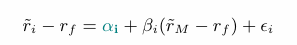

Here, 𝑟𝑖 − 𝑟𝑓 is the excess return of a stock, and 𝑟𝑀−𝑟𝑓 is the excess market return. The regression estimates the stock's alpha (𝛼𝑖) and beta (𝛽𝑖). Alpha represents the stock’s independent performance not explained by the market, while beta measures the stock’s sensitivity to the market. The p-values help assess the significance of these coefficients, and the residuals (𝜖𝑖) represent the part of the stock’s returns unexplained by the market.

In the code, the risk free rate is assumed to be 0, then we calculate the excess returns of each stock: 𝑟𝑖 − 𝑟𝑓 and we also find the excess market return 𝑟𝑀−𝑟𝑓. For each stock, the OLS regression fits the excess stock returns on the excess market returns to estimate alpha (𝛼𝑖) and beta (𝛽𝑖). Alpha represents how much the stock outperforms (or underperforms) independent of the market, while beta measures how sensitive the stock is to market fluctuations. The sm.OLS function is used to compute the regression, and the resulting alpha and beta are stored, along with their p-values (which measure the statistical significance of these estimates).

In CAPM, 𝛼=0 means the asset’s return is exactly what you would expect for its level of market risk (measured by 𝛽). The asset is priced "fairly," so there is no excess return beyond what is explained by its risk relative to the market. According to CAPM theory, all assets should have 𝛼=0, meaning no risk-adjusted abnormal return.

If an asset/stock has α>0, then the asset is generating a return higher than expected based on its risk (market beta). This violates CAPM, and suggests the asset is underpriced or offers excess return. A beta of 1 implies that the asset moves in line with the market: when the market goes up or down by 1%, the stock does as well.

TSLA and AMZN show positive and significant alpha (both 0.175 and 0.102 are <0.05 at a 5% signficance level), indicating outperformance beyond their expected returns. Both assets also have high beta (high systemic risk), suggesting they are more volatile and respond strongly to market changes and both are significant. AAPL also shows positive alpha (0.05) but is insignificant, although it is close to being significant(0.06 < 0.05) It has a beta slightly above 1 (1.11), making it more volatile than the market. Google has a small alpha close to 0 though it is insignificant. The alpha close to 0 suggests that it aligns closely with the market and the beta is slightly above 1. IBM, MGM, T and BA all show negative alphas, though only IBM has a signficant alpha. IBM and T both underperforms slightly as their betas fall under 1, both betas are signficant (less than 0.05). 
MGM and BA on the other hand have high systemic risk. The stock wiht the closest alpha to 0 is BA (-0.002)

Investors looking for excess return (alpha) might consider TSLA and AMZN as they have a much stronger performance. However, they come with higher market risk (beta). Conversely, T and IBM have less risk but underperform relative to market expectations, making them less attractive for a growth-focused portfolio. We can plot out the risks and returns as seen in the code below. 

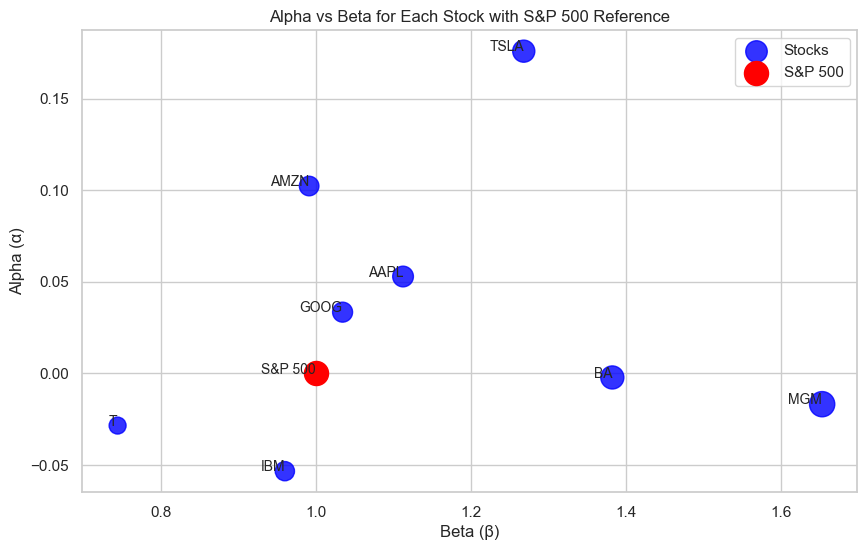

In [56]:
plt.figure(figsize=(10, 6))

# Generate Scatter plot of Alpha and Beta
plt.scatter(results['Beta (β_i)'], results['Alpha (α_i)'],
            # Scale size of points (based on Beta size)
            s=abs(results['Beta (β_i)']) * 200,  
            color='blue', alpha=0.8, label="Stocks")

# Adding stock labels
for i, stock in enumerate(results['Stock']):
    plt.text(results['Beta (β_i)'][i], results['Alpha (α_i)'][i], stock, fontsize=10, ha='right')

# Add S&P 500 (by CAPM, S&P 500 has Beta = 1, Alpha = 0)
plt.scatter(1, 0, color='red', s=300, label="S&P 500")
plt.text(1, 0, 'S&P 500', fontsize=10, ha='right')

# Labels and title
plt.xlabel('Beta (β)')
plt.ylabel('Alpha (α)')
plt.title('Alpha vs Beta for Each Stock with S&P 500 Reference')

# Show plot
plt.grid(True)
plt.legend()
plt.show()


Based on the graph we can see the stock with the highest beta is MGM, followed by BA and TSLA. These are the stocks with the highest systemic risk. This means they fluctuate more with market movements. On the other hand, the stocks with the highest alpha is TSLA followed by AMZN. Indicating high returns. As mentioned before, TSLA is a high-beta stock with significant excess returns, making it appealing to investors that are willing to take on more risk for potentially higher rewards. On the other hand MGM and BA have high betas but very low returns. AMZN, AAPL, and GOOG offer positive alpha with market-level risk or slightly higher, so these are good choices for investors who want more of a balance, moderate growth and not too excessive risk. More risk adverse investors would want stocks like IBM and T with low risk, however, there is also negative returns so it would not really be worth it. 


Now that we have looked at the risk that stems from the market, we should look at risk that cannot be explainied by the market (ei) which is also an essential part of CAPM. Below we calculate the error terms based on predicted returns and then we generate histograms are shown for each stock.

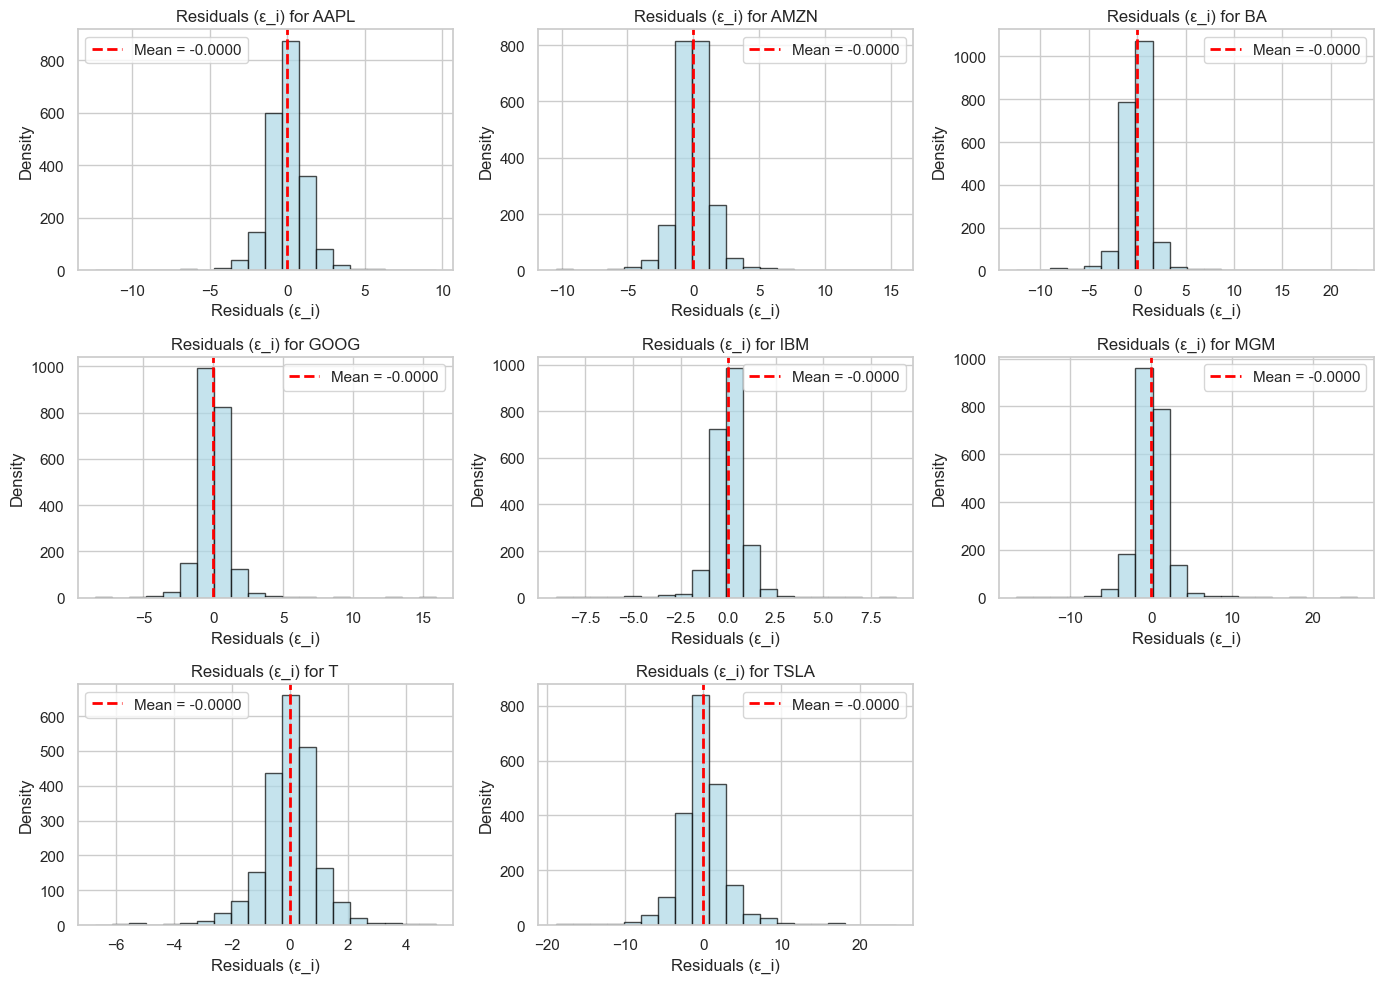

In [91]:
import matplotlib.pyplot as plt

# Compute residuals and plot histograms
residuals = {}

# r_M and r_i have already been identified.
for stock in stock_columns:
    r_M_excess = excess_market_returns
    r_i_excess = excess_returns[stock]

    # Add constant to include alpha in the regression
    r_M_excess = sm.add_constant(r_M_excess)

    # Run OLS regression: (r_i - r_f) = α_i + β_i * (r_M - r_f) + ε_i
    model = sm.OLS(r_i_excess, r_M_excess).fit()

    # Extract the predicted returns
    predicted_returns = model.predict(r_M_excess)

    # Calculate the residuals (error terms ε_i = observed - predicted)
    residuals[stock] = r_i_excess - predicted_returns

# Plot histograms of residuals (error terms) for each stock
plt.figure(figsize=(14, 10))

for i, stock in enumerate(stock_columns):
    plt.subplot(3, 3, i+1)
    
    # Plot histogram of residuals
    plt.hist(residuals[stock], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
    
    # Calculate and plot the mean of the residuals
    mean_residual = residuals[stock].mean()
    plt.axvline(mean_residual, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_residual:.4f}')
    
    # Add title and labels
    plt.title(f'Residuals (ε_i) for {stock}')
    plt.xlabel('Residuals (ε_i)')
    plt.ylabel('Density')
    plt.legend()
    
    # Add grid for easier comparison
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



Looking at the histograms, we can see that AAPL, GOOGL, and IBM have more narrow distributions. This indicates that there is less unexplained risk for these stocks and the market mostly explains the variability. These stocks will more closely follow the market. TSLA, BA and MGM have a wider residual distribution which menas that much of the stocks variability cannot be explained by the market. This makes some sense as in the beginning we saw that there were not such strong correlations to the market with these stocks. This is especially the case for TSLA as also there is rather high risk compared to the market. T and AMZN are somewhere in the middle with a more moderate degree of variability that cannot be explained by the market. 

- Your boss wants to take a lot of risk to deliver high return. He asks you to (i) select the 4 riskier assets (over the full period), (ii) form an equally weighted portfolio, and (iii) to estimate the portfolio return based on parameters (β and rm) estimated above. First lets add the resiudals into the same dataframe:

In [88]:
# Taking the mean residuals of each stock
residuals = {
    'AAPL': residuals['AAPL'].mean(),
    'AMZN': residuals['AMZN'].mean(),
    'BA': residuals['BA'].mean(),
    'GOOG': residuals['GOOG'].mean(),
    'IBM': residuals['IBM'].mean(),
    'MGM': residuals['MGM'].mean(),
    'T': residuals['T'].mean(),
    'TSLA': residuals['TSLA'].mean()
}

# Assign residuals manually by looping over rows
residual_column = []
for stock in results['Stock']:
    residual_column.append(residuals[stock])

# Add the residuals as a new column in the results DataFrame
results['Residual (ϵ_i)'] = residual_column

# Check if residuals have been assigned correctly
print("Results with residuals:")
print(results)

Results with residuals:
  Stock  Alpha (α_i)  Beta (β_i)  p-value Alpha   p-value Beta  Residual (ϵ_i)
0  AAPL     0.052837    1.112891       0.067202  3.521164e-267   -2.403597e-16
1  AMZN     0.102261    0.991732       0.003512  2.611172e-163   -1.300576e-16
2    BA    -0.002292    1.382867       0.951096  7.299279e-251   -8.560756e-17
3  GOOG     0.033371    1.034881       0.180655  2.345742e-298   -2.691699e-16
4   IBM    -0.053480    0.960416       0.014747  1.185758e-322   -1.411702e-16
5   MGM    -0.016893    1.653568       0.712986  1.874186e-240   -2.667005e-16
6     T    -0.028577    0.744630       0.182942  4.892378e-227   -1.119483e-16
7  TSLA     0.175917    1.268611       0.009920   1.965135e-78   -5.268157e-16


In [89]:
# Sort stocks by beta to find the 4 riskiest (highest beta) assets
riskier_assets = results.nlargest(4, 'Beta (β_i)')

print("4 Riskier Assets:")
print(riskier_assets)

4 Riskier Assets:
  Stock  Alpha (α_i)  Beta (β_i)  p-value Alpha   p-value Beta  Residual (ϵ_i)
5   MGM    -0.016893    1.653568       0.712986  1.874186e-240   -2.667005e-16
2    BA    -0.002292    1.382867       0.951096  7.299279e-251   -8.560756e-17
7  TSLA     0.175917    1.268611       0.009920   1.965135e-78   -5.268157e-16
0  AAPL     0.052837    1.112891       0.067202  3.521164e-267   -2.403597e-16


The 4 riskier assets are MGM, BA, TSLA and AAPL as they have the highest beta. However, it should be noted that there are 2 with low returns (alpha) over the full 8 year period. However, for the sake of assuming that riskier assets have the potential to yield higher returns, we stick with these assets. 

In [94]:
# Equal weighting for each selected stock for an equally weighted portfolio
weights = [0.25] * 4  

# Calculate portfolio beta, alpha, and residuals
portfolio_beta = np.dot(weights, riskier_assets['Beta (β_i)'])
portfolio_alpha = np.dot(weights, riskier_assets['Alpha (α_i)'])
portfolio_residual = np.dot(weights, riskier_assets['Residual (ϵ_i)'])

# risk free rate assumed to be 0
rf = 0 

# Estimate the portfolio return based on beta and rm
market_return = returns['sp500'].mean()  # Average market return over the period
portfolio_return = rf + portfolio_beta * (market_return - rf)


In [93]:
print(f"\nPortfolio Beta: {portfolio_beta:.4f}")
print(f"Portfolio Alpha: {portfolio_alpha:.4f}")
print(f"Portfolio Residual: {portfolio_residual:.4f}")
print(f"\nEstimated Portfolio Return: {portfolio_return:.4f}")


Portfolio Beta: 1.3545
Portfolio Alpha: 0.0524
Portfolio Residual: -0.0000

Estimated Portfolio Return: 0.0668


This equally weighter portfolio with the 4 riskiest assets represents a higher-risk, higher-reward strategy. With a beta of 1.35, it carries more risk than the market, but the positive alpha of 0.668 shows that the assets in the portfolio are expected to outperform the market. The nearly zero residual suggests the portfolio returns are explained well by market movements as it follows closely. Thus, there are more systemic risks (beta) than there are stock related risks. This portfolio thus aligns with a strategy focused on high returns through increased risk.

## Task #3 : Testing the CAPM theory

• The goal of this last part is to test the CAPM model predictions
1. For each year : compute βy−1 over 252 business days at the end of each i year y − 1 (OLS regression)
2. At the end or year y, compare the average return of the stock r ̄i (annualized) to the one predicted by the CAPM model rˆM (using βi y measured at y − 1 but the average market return r ̄M measured at y). 3. Generate the scatter plot of the realized returns against the beta or find innovative ways to plot you results.
4. Alternatively, you may use a β computed over longer (shorter) periods of time.
5. Comment your results in the light of yesterday’s lecture : try to give as much economic interpretation as you can !

In [95]:
# Ensure date time variable
normalized_data['Date'] = pd.to_datetime(normalized_data['Date'])

# Calculate daily returns using the function based on the normalized data
returns = daily_returns(normalized_data)

# Create a list of the stock columns (exclude 'sp500' (it is the x axis) and 'Date' for plotting)
stock_columns = returns.columns.difference(['Date', 'sp500'])